In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import sys
#import tqdm
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap, cm

In [2]:
path = 'F:/Series/AEMET/temperatura_diaria/'
provincias = ['Asturias', 'Leon', 'Palencia']

In [30]:
file = os.listdir(path)[0]
file

'Leon.csv'

In [31]:
aux_file = pd.read_csv(path + 'file', sep=';', encoding='latin-1')

In [33]:
Indicativo=list()
year_ini=list()
year_fin=list()
for file in os.listdir(path):
    aux_file=pd.read_csv(path + file, sep=';', encoding='latin-1')
    aux_file['INDICATIVO']=aux_file['INDICATIVO'].astype('str')
    gauges=np.unique(aux_file['INDICATIVO'].values)
    Indicativo.append(gauges)
    for gauge in gauges:
        years=aux_file['ANO'].loc[aux_file['INDICATIVO']==gauge].values
        year_ini.append(np.min(years))
        year_fin.append(np.max(years))
Indicativo_flat_list = [item for sublist in Indicativo for item in sublist]
print(Indicativo_flat_list)

['1178A', '1178Y', '1186', '1541B', '1543', '1548E', '1549', '1550', '1556H', '1556X', '1557B', '1561G', '1561I', '1565F', '1565G', '1565I', '1569', '1569A', '1569B', '1574R', '1576A', '1577O', '2366', '2366E', '2568', '2590', '2621E', '2623', '2624', '2624C', '2624I', '2626', '2626Y', '2630A', '2630X', '2633', '2636', '2647I', '2647O', '2647Y', '2650A', '2650E', '2652', '2652E', '2659', '2661', '2661B', '2661O', '2664', '2664A', '2664B', '2666', '2667', '2674E', '2679U', '2680', '2685A', '2689A', '2697', '2701D', '2703', '2705', '2706', '2707U', '2708E', '2712E', '2716I', '2717', '2721', '2722', '2722E', '2728', '2728B', '2730', '2734A', '2734D', '2737E', '2737I', '2737O', '2739', '2742', '2742O', '2742R', '2744', '2747', '2747E', '2752']


# Veo cuantas estaciones tienen más de 15 años entre 1985 y 2005

In [34]:
Indicativo = np.array(Indicativo_flat_list)
year_fin = np.array(year_fin)
year_ini = np.array(year_ini)

In [35]:
Estaciones = np.sum((year_fin -1985) > 20)
print(Estaciones)
print(np.max(year_fin))
print(np.min(year_ini))

49
2018
1911


# Selecciono estaciones desde 1980 hasta el 2000

In [36]:
time = pd.date_range(start='1911-01-01', end='2018-04-30', freq='D')
Dataframe_series = pd.DataFrame(index=time)

In [38]:
Id=list()
Nombre=list()
Alt=list()
NOM_PROV=list()
LONGITUD=list()
LATITUD=list()
DATUM=list()

for file in os.listdir(path):
    aux_file=pd.read_csv(path + file, sep=';', encoding='latin-1')
    print('Leo estaciones de la provincia de ' + str(aux_file['NOM_PROV'].values[0]))
    aux_file['INDICATIVO']=aux_file['INDICATIVO'].astype('str')
    gauges=np.unique(aux_file['INDICATIVO'].values)
    for gauge in gauges:
        aux_gauge=aux_file[aux_file['INDICATIVO']==gauge]
        years=np.array(aux_gauge['ANO'].values)
        if any(years>=time.year[0]) & any(years<time.year[-1]):
            aux_gauge=aux_gauge[aux_gauge['ANO']>=time.year[0]]; aux_gauge=aux_gauge[aux_gauge['AÑO']<time.year[-1]]
            if np.shape(aux_gauge)[0]==0:
                continue
            Id.append(aux_gauge['INDICATIVO'].values[0])
            Nombre.append(aux_gauge['NOMBRE'].values[0])
            Alt.append(aux_gauge['ALTITUD'].values[0])
            NOM_PROV.append(aux_gauge['NOM_PROV'].values[0])
            LONGITUD.append(aux_gauge['LONGITUD'].values[0])
            LATITUD.append(aux_gauge['LATITUD'].values[0])
            DATUM.append(aux_gauge['DATUM'].values[0])
            Dataframe_series[gauge]=np.nan
            n=0
            for y, m in zip(aux_gauge['ANO'].values, aux_gauge['MES'].values): 
                posi=np.where((Dataframe_series.index.year==y) & (Dataframe_series.index.month==m))[0]
                Dataframe_series[gauge].iloc[posi]=(aux_gauge.iloc[n][9:9+len(posi)].values).astype('float')
                n=n+1

Leo estaciones de la provincia de LEON


KeyError: 'AÑO'

In [52]:
Dataframe_series.index.name = 'fecha'
Dataframe_series.to_csv(path + 'Palencia_dataframe.csv')

In [22]:
Dataframe_series.shape

(39202, 319)

In [23]:
Dataframe_series.head()

,1178,1178A,1178Y,1185,1186,1538O,1539,1539E,1539G,1539I,...,2746O,2747,2747E,2747G,2748I,2750,2751,2751E,2752,2752I
fecha,,,,,,,,,,,,,,,,,,,,,
1911-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1911-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1911-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1911-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1911-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
Dataframe_series.columns

Index(['1178', '1178A', '1178Y', '1185', '1186', '1538O', '1539', '1539E',
       '1539G', '1539I',
       ...
       '2746O', '2747', '2747E', '2747G', '2748I', '2750', '2751', '2751E',
       '2752', '2752I'],
      dtype='object', length=319)

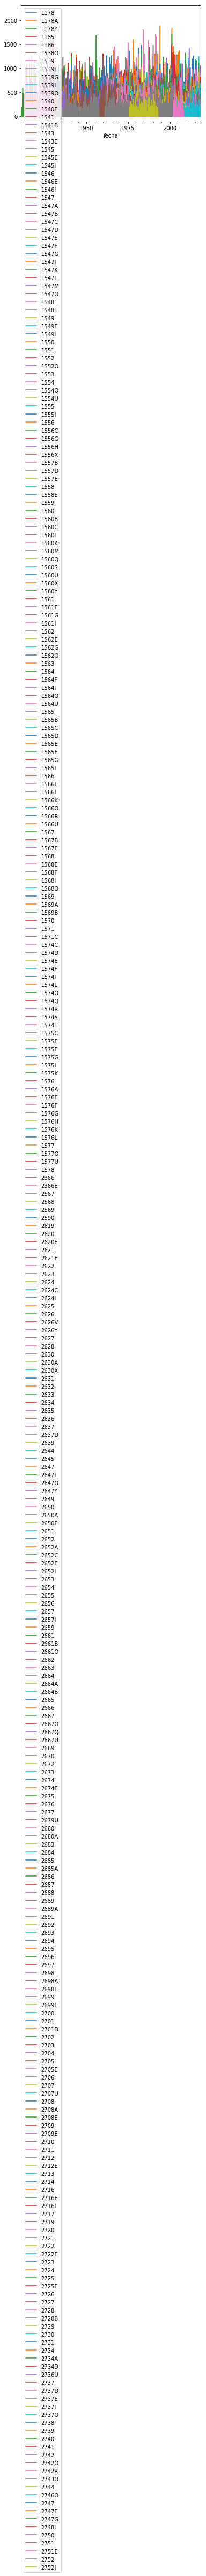

In [26]:
Dataframe_series.plot();